In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
methods = ["Transpose", "Pseudoinverse", "DLS"]
trials = [10, 20, 30, 40, 50]

# Trial by Method, recorded from previous runs
iterations = np.array([[ 601,  236,  242,],
 [ 932,  218,  273.],
 [1165,  304,  300.],
 [1399,  320,  323.],
 [1560,  347,  347.]])

avg_errors = np.array([[0.0075453,  0.0185824,  0.01659668],
 [0.00668652, 0.08620312, 0.01676381],
 [0.00632133, 0.02107487, 0.01758885],
 [0.00659449, 0.0227557,  0.01676777],
 [0.00634295, 0.06644525, 0.01515416]])

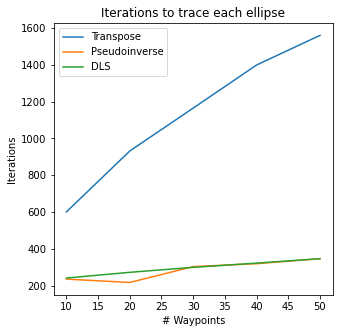

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, iterations[:, 0], label="Transpose")
ax.plot(trials, iterations[:, 1], label="Pseudoinverse")
ax.plot(trials, iterations[:, 2], label="DLS")

ax.set_title("Iterations to trace each ellipse")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Iterations")

plt.legend()
plt.show()

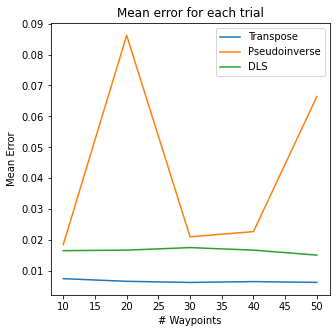

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, avg_errors[:, 0], label="Transpose")
ax.plot(trials, avg_errors[:, 1], label="Pseudoinverse")
ax.plot(trials, avg_errors[:, 2], label="DLS")

ax.set_title("Mean error for each trial")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Mean Error")

plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Webots import *

In [4]:
actual_twists = np.array(actual_twists)
desired_twists = np.array(desired_twists)
end_effector_positions = np.array(end_effector_positions)

In [5]:
print(actual_twists - desired_twists)

[[-5.16388277e-05 -6.45148401e-02  1.38757418e-03  6.36821593e-05
  -8.36297099e-05  5.30094290e-05]
 [-9.20321617e-05 -5.39574571e-02  1.19079943e-03  1.15965791e-04
  -1.53978500e-04  9.75193253e-05]
 [-1.24343645e-04 -4.35056507e-02  9.89617813e-04  1.55105619e-04
  -2.08449987e-04  1.31973059e-04]
 ...
 [-3.03318164e-04 -6.72014594e-03 -1.99615441e-05  1.15718253e-04
  -2.03701547e-04  9.74520548e-05]
 [-1.48322195e-04 -2.56289276e-04  7.54526095e-05  2.69287379e-05
  -3.98591676e-05  3.26564484e-05]
 [-2.51132124e-05 -1.55984913e-05  1.33530652e-05  7.47495035e-07
   2.27449450e-07  1.41879702e-06]]


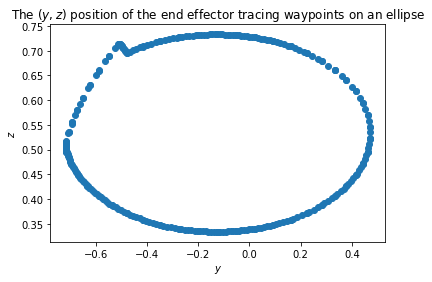

In [13]:
fig, ax = plt.subplots(1, 1)
ax.scatter(end_effector_positions[:, 1], end_effector_positions[:, 2])
ax.set_ylabel("$z$")
ax.set_xlabel("$y$")

ax.set_title("The $(y, z)$ position of the end effector while tracing waypoints on an ellipse")


plt.show()

In [9]:
i = 0
while robot.step(timestep) != -1:
    position = positions[i]
    [motor.setPosition(angle) for motor, angle in zip(joint_motors, position)]

    i += 1
    if i == len(positions):
        break
